<a href="https://colab.research.google.com/github/bot5294/AL_ML_21_days_21_projects/blob/main/Day_6/Aqib_21_Days_B5_D6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Time Series Analysis & Forecasting 📈

**Project Objective:** To build a time series model to forecast the number of airline passengers for future months. This project provides a comprehensive, step-by-step guide to time series analysis, from data decomposition and stationarity testing to building and evaluating ARIMA and SARIMA models.

### Core Concepts We'll Cover:
1.  **Time Series Fundamentals:** Understanding the components of a time series (Trend, Seasonality, Residuals).
2.  **Stationarity:** Learning what stationarity is, why it's crucial for many models, and how to test for it (Augmented Dickey-Fuller test).
3.  **Data Transformation:** Applying techniques like differencing and log transforms to make a series stationary.
4.  **Model Identification:** Using Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots to determine model parameters.
5.  **ARIMA Modeling:** Building a baseline ARIMA model for forecasting.
6.  **SARIMA Modeling:** Extending ARIMA to build a powerful SARIMA model that explicitly handles seasonality.
7.  **Forecasting & Evaluation:** Making predictions and evaluating model performance.

### **Theoretical Concept: What is a Time Series?**

A time series is a sequence of data points collected or recorded at specific time intervals (e.g., daily, monthly, yearly). Unlike other datasets we've worked with, the order of data points in a time series is critical.

A time series can be broken down into several components:
1.  **Trend:** The long-term upward or downward movement in the data.
2.  **Seasonality:** A repeating, predictable pattern over a fixed period (e.g., sales are higher every December).
3.  **Cyclical Component:** Patterns that occur at irregular, non-fixed intervals (e.g., business cycles). This is often harder to model and is sometimes combined with the trend.
4.  **Residuals (or Noise):** The random, irregular fluctuations that are left over after the other components have been removed.



### Step 1: Setup - Importing Libraries and Loading Data

In [ ]:
pip install statsmodels

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
!git clone 'https://github.com/bot5294/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 17.03 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [7]:
df = pd.read_csv('/content/Datasets/Airline Timeseries/airline_passenger_timeseries.csv')

In [8]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


### Step 2: Exploratory Data Analysis & Decomposition

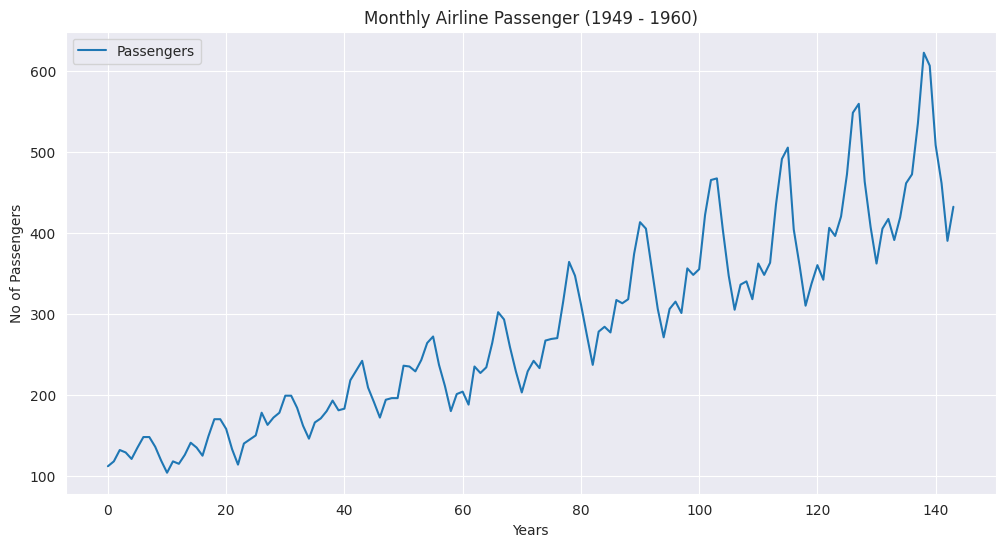

In [ ]:
df.plot()
plt.title("Monthly Airline Passenger (1949 - 1960)")
plt.xlabel("Years")
plt.ylabel('No of Passengers')
plt.show()

**Initial Observation:** The plot clearly shows two strong patterns:
1.  **Upward Trend:** The number of passengers is increasing over time.
2.  **Seasonality:** There is a clear, repeating annual pattern (peaks and troughs within each year).
3.  **Increasing Variance:** The seasonal fluctuations appear to be getting larger over time.

In [ ]:
## Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
## Decompose the time series to visualize its components
decomposition = sm.tsa.seasonal_decompose(df['Passengers'],model='multiplicative')

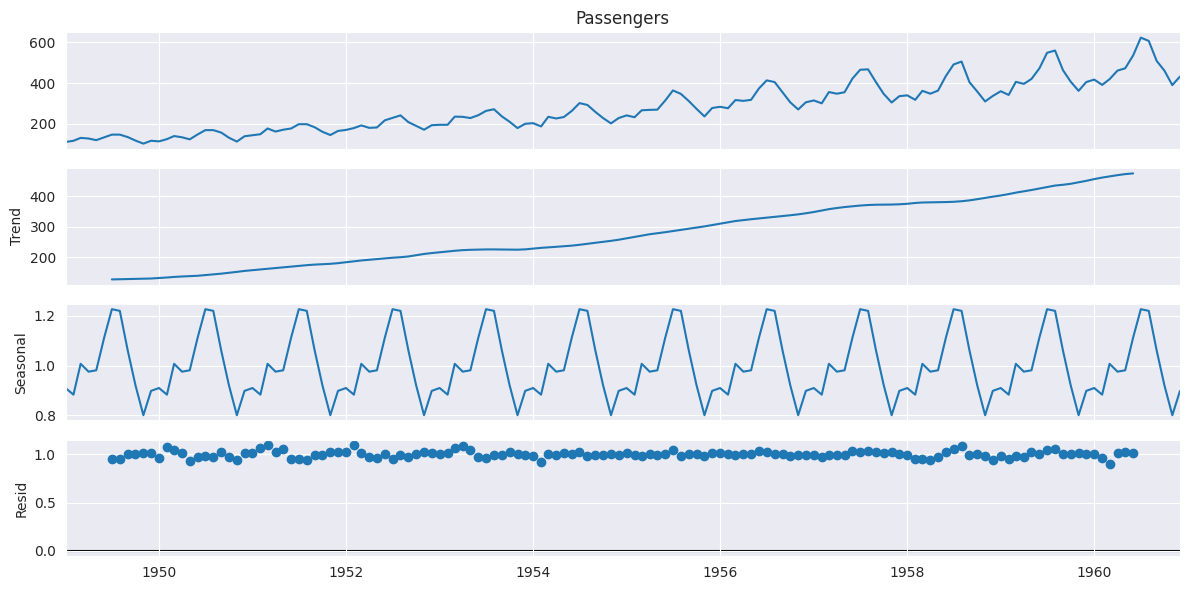

In [ ]:
fig = decomposition.plot()
plt.show()

### Step 3: Stationarity Testing
Before we can build a model like ARIMA, the time series needs to be **stationary**.

#### **Theoretical Concept: Stationarity**
A time series is said to be stationary if its statistical properties—specifically the **mean**, **variance**, and **autocorrelation**—are all constant over time.

- **Why is it important?** Stationary series are easier to model and forecast. If a series is stationary, its past behavior is a good predictor of its future behavior. Our passenger data is clearly **non-stationary** because its mean (the trend is increasing) and variance (the seasonal swings are growing) are not constant.

**How to test for it?**
1.  **Visual Inspection:** Look at the plot. Is there a clear trend or seasonality?
2.  **Statistical Tests:** The **Augmented Dickey-Fuller (ADF) Test** is a common statistical test.
    - **Null Hypothesis ($H_0$):** The series is non-stationary.
    - **Alternative Hypothesis ($H_1$):** The series is stationary.

We want to **reject the null hypothesis**. To do this, we need the **p-value** from the test to be less than a significance level (e.g., 0.05).

#### Think of the ADF test as asking the question: "Does this time series have a trend or other patterns that make it non-stationary?"

Here's what each part means:

* Test Statistic: This is a number calculated from your data. It's the main result of the test.
* p-value: This is the most important number for a beginner. It tells you how likely it is that you would get your results if the time series were actually stationary (which is the opposite of what we usually want).
* If the p-value is small (usually less than 0.05): This means it's very unlikely to get these results if the series were stationary. So, you can confidently say, "Okay, this series is not stationary."
* If the p-value is large (like yours, 0.99): This means it's quite likely to get these results even if the series were stationary. So, you cannot confidently say it's not stationary. In other words, you fail to reject the null hypothesis, which is that the series is non-stationary.
###Lags Used: This is the number of past data points the test looked at to help make its decision.
* Number of Observations Used: This is how many data points from your time series were actually used in the test calculation.
* Critical Value (1%), (5%), (10%): These are threshold values. If your "Test Statistic" is smaller than one of these critical values (more negative), you would reject the null hypothesis at that confidence level. For example, if your Test Statistic was less than -3.48 (the 1% critical value), you'd be very confident (99%) that the series is stationary.
Why do we use it?

* We use the ADF test (and look at the p-value) because many powerful time series forecasting models, like ARIMA, assume that the data they are working with is stationary. If your data is not stationary, these models might not work well or give you inaccurate forecasts. The ADF test gives us a statistical way to check this assumption before we build our models.

* In your case, the high p-value (0.99) tells us that your 'Passengers' data is non-stationary, just as we suspected from looking at the plot earlier. This confirms that you need to perform transformations (like differencing) to make it stationary before building an ARIMA model.

In [ ]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df['Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### Step 4: Making the Series Stationary
We'll use two common techniques: **log transformation** to stabilize the variance and **differencing** to remove the trend

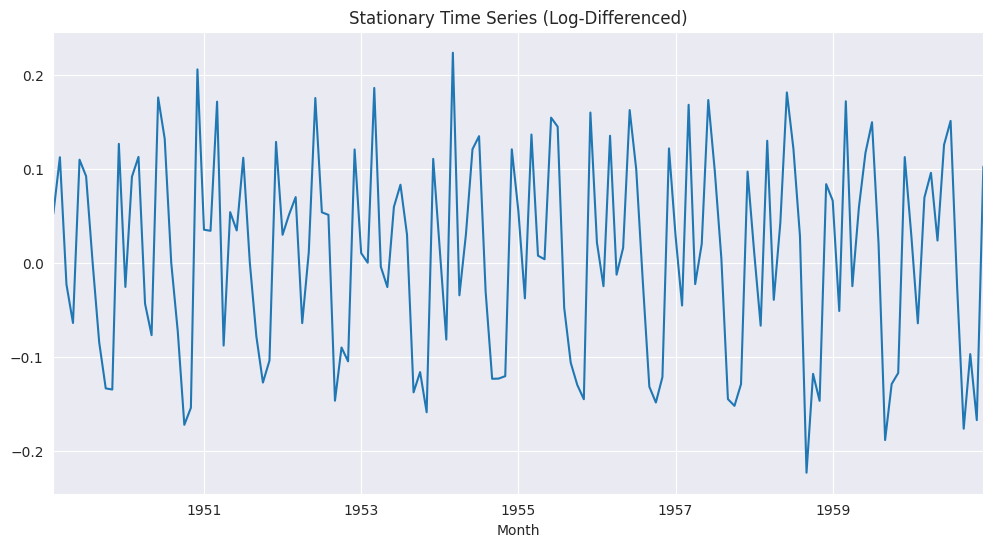

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
# 1. Apply log transformation to stabilize the variance
df_log = np.log(df['Passengers'])

# 2. Apply differencing to remove the trend
df_diff = df_log.diff().dropna()

# Plot the stationary series
df_diff.plot()
plt.title('Stationary Time Series (Log-Differenced)')
plt.show()

# Retest for stationarity
test_stationarity(df_diff)

ACF (Autocorrelation Function): Measures the correlation between a time series and its lagged versions (e.g., how much the value today is correlated with the value yesterday, the day before, etc.). The plot shows spikes at lags where there is significant autocorrelation.
PACF (Partial Autocorrelation Function): Measures the direct correlation between a time series and its lagged versions, after removing the effects of the intermediate lags. It helps identify the direct relationship between the current value and a specific lagged value.
These plots help us determine the p and q parameters for the ARIMA model:

### Step 5: Model Identification with ACF and PACF Plots

#### **Theoretical Concept: ACF and PACF**
To choose the parameters for our ARIMA model, we use autocorrelation plots.

- **Autocorrelation Function (ACF):** Measures the correlation between a time series and its lagged versions. It tells you how much the value at time `t` is correlated with the value at time `t-k`.
- **Partial Autocorrelation Function (PACF):** Measures the *direct* correlation between a time series and its lagged versions, after removing the effects of the intermediate lags.

**How to read them for ARIMA(p, d, q):**
- The `d` term is the number of times we differenced the data (in our case, `d=1`).
- The `p` (AR term) is suggested by the number of significant lags in the **PACF** plot.
- The `q` (MA term) is suggested by the number of significant lags in the **ACF** plot.

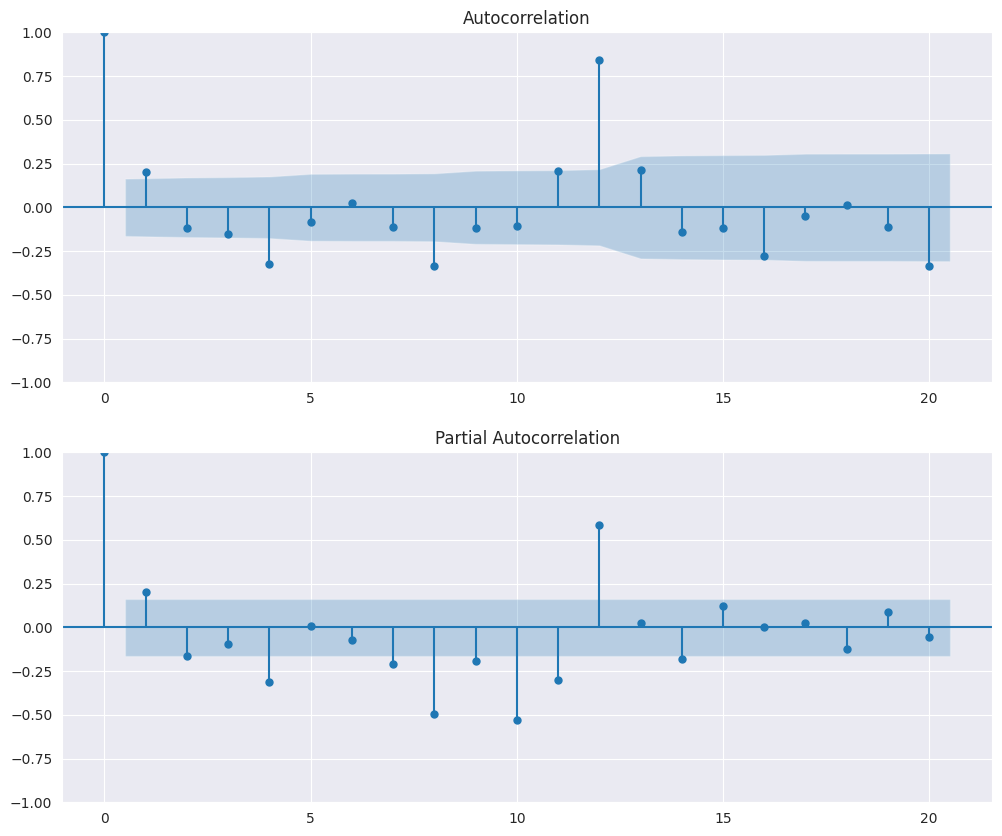

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df_diff, ax=ax1, lags=20)
plot_pacf(df_diff, ax=ax2, lags=20)
plt.show()

**Interpretation:**
- **PACF Plot:** Cuts off sharply after lag 1. This suggests `p=1`.
- **ACF Plot:** Also seems to cut off after lag 1. This suggests `q=1`.
Based on this, a good starting point for our model is **ARIMA(1, 1, 1)**.

## **Theoretical Concept: ARIMA**
**AutoRegressive Integrated Moving Average (ARIMA)** models are a class of statistical models for analyzing and forecasting time series data. An ARIMA model is characterized by three parameters:

- **AR (Autoregressive) - p:** The number of lag observations included in the model. This term captures the relationship between the current observation and its past values.
- **I (Integrated) - d:** The number of times that the raw observations are differenced. This is done to make the time series stationary.
- **MA (Moving Average) - q:** The size of the moving average window. This term captures the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The model is typically denoted as **ARIMA(p, d, q)**.

### Step 6: Building the ARIMA Model

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


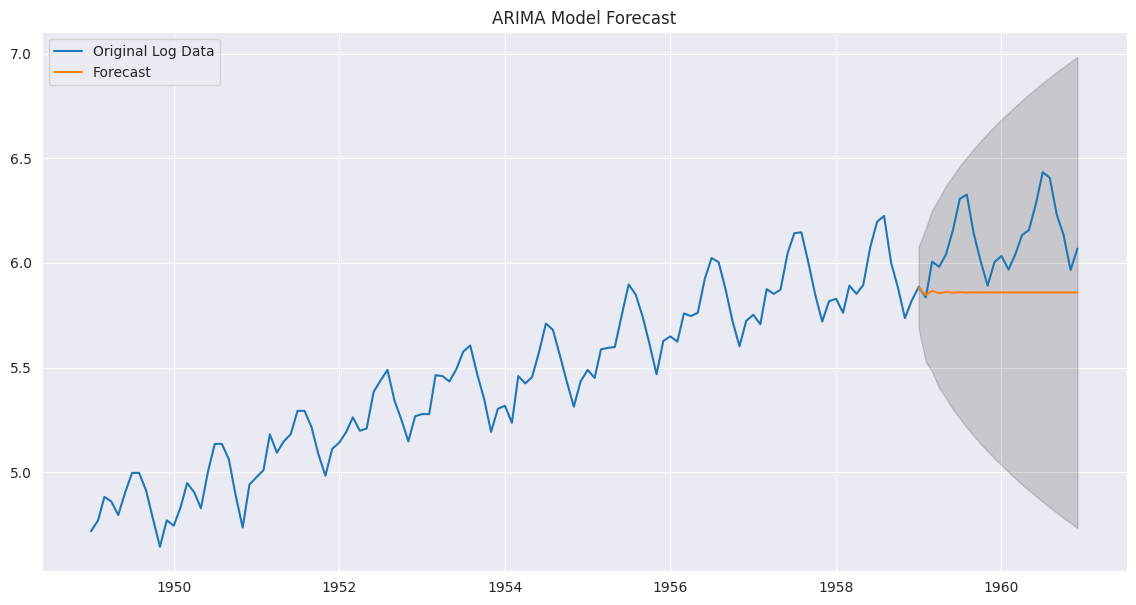

In [ ]:

# Split data into training and test sets
train_data = df_log[:'1958']
test_data = df_log['1959':]

# Build ARIMA model
model = ARIMA(train_data, order=(1, 1, 1), freq='MS')
arima_result = model.fit()

# Get forecast
forecast = arima_result.get_forecast(steps=len(test_data))
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Original Log Data')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=.15)
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

**ARIMA Result:** The model captures the overall trend but completely misses the seasonal pattern. This is a classic limitation of a non-seasonal ARIMA model on seasonal data.

### Step 7: Building a SARIMA Model for Seasonality

#### **Theoretical Concept: SARIMA**
**Seasonal AutoRegressive Integrated Moving Average (SARIMA)** is an extension of ARIMA that explicitly models the seasonal component.

It is written as **SARIMA(p, d, q)(P, D, Q, m)**, where:
- `(p, d, q)` are the non-seasonal parameters:
    - **p (non-seasonal AR order):** The number of non-seasonal lagged observations included in the model.
    - **d (non-seasonal differencing order):** The number of times the data is differenced to remove non-seasonal trend.
    - **q (non-seasonal MA order):** The number of non-seasonal lagged forecast errors included in the model.

- `(P, D, Q, m)` are the seasonal parameters:
    - **P (seasonal AR order):** The number of seasonal lagged observations included in the model.
    - **D (seasonal differencing order):** The number of times the data is differenced seasonally to remove seasonal trend.
    - **Q (seasonal MA order):** The number of seasonal lagged forecast errors included in the model.
    - **m (number of periods in a season):** The number of time steps for a single seasonal period (e.g., `m=12` for monthly data with an annual seasonality, `m=4` for quarterly data).

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


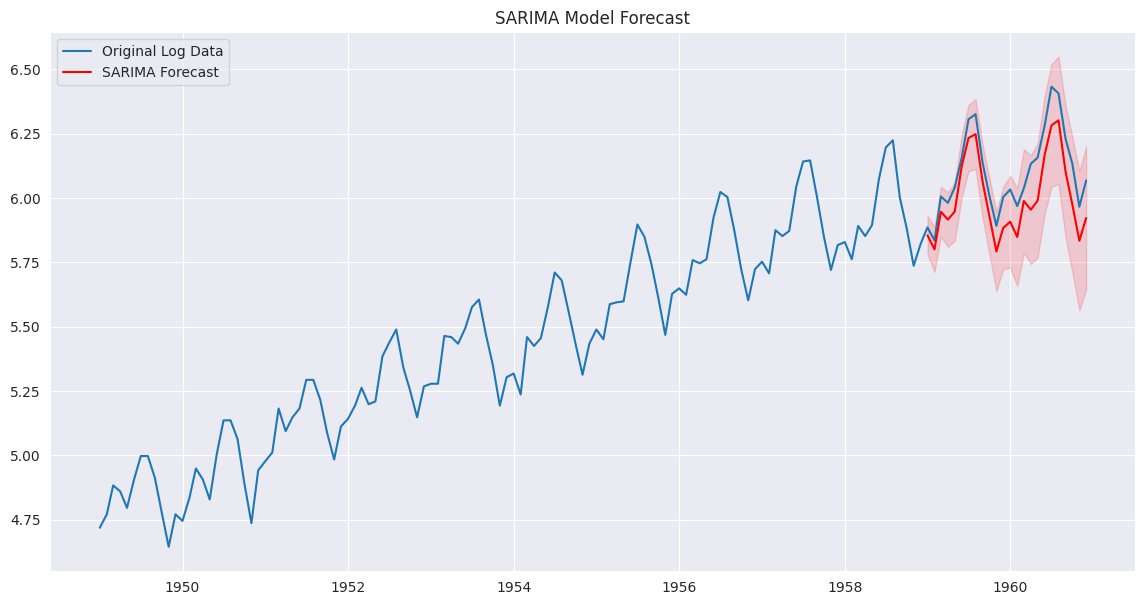

In [ ]:
# Build SARIMA model
# We can find the optimal P, D, Q through a grid search, but common values are 1.
sarima_model = sm.tsa.statespace.SARIMAX(train_data,
                                          order=(1, 1, 1),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          freq='MS') # Explicitly set frequency to suppress warnings
sarima_result = sarima_model.fit()

# Get forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test_data))
sarima_forecast_ci = sarima_forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Original Log Data')
plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast', color='red')
plt.fill_between(sarima_forecast_ci.index, sarima_forecast_ci.iloc[:, 0], sarima_forecast_ci.iloc[:, 1], color='r', alpha=.15)
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

**SARIMA Result:** This is a massive improvement! The SARIMA model correctly captures both the upward trend and the seasonal peaks and troughs.

### Step 8: Final Evaluation

SARIMA Model RMSE: 48.25


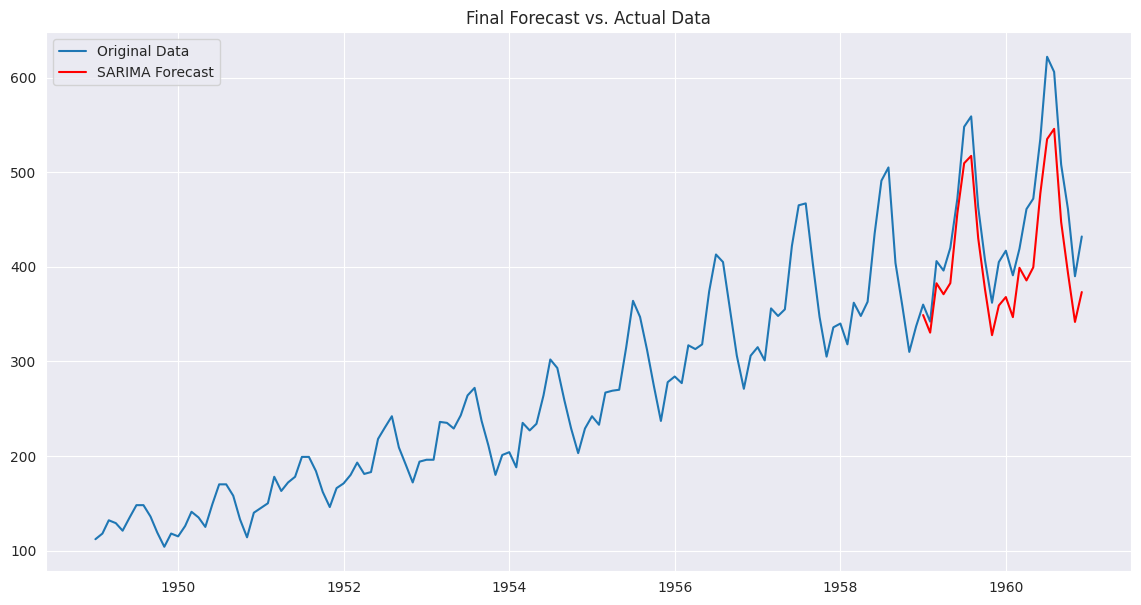

In [ ]:
# Reverse the log transformation to get actual passenger numbers
original_test_data = np.exp(test_data)
sarima_predictions = np.exp(sarima_forecast.predicted_mean)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(original_test_data, sarima_predictions))
print(f"SARIMA Model RMSE: {rmse:.2f}")

# Plot final results
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(sarima_predictions, label='SARIMA Forecast', color='red')
plt.title('Final Forecast vs. Actual Data')
plt.legend()
plt.show()

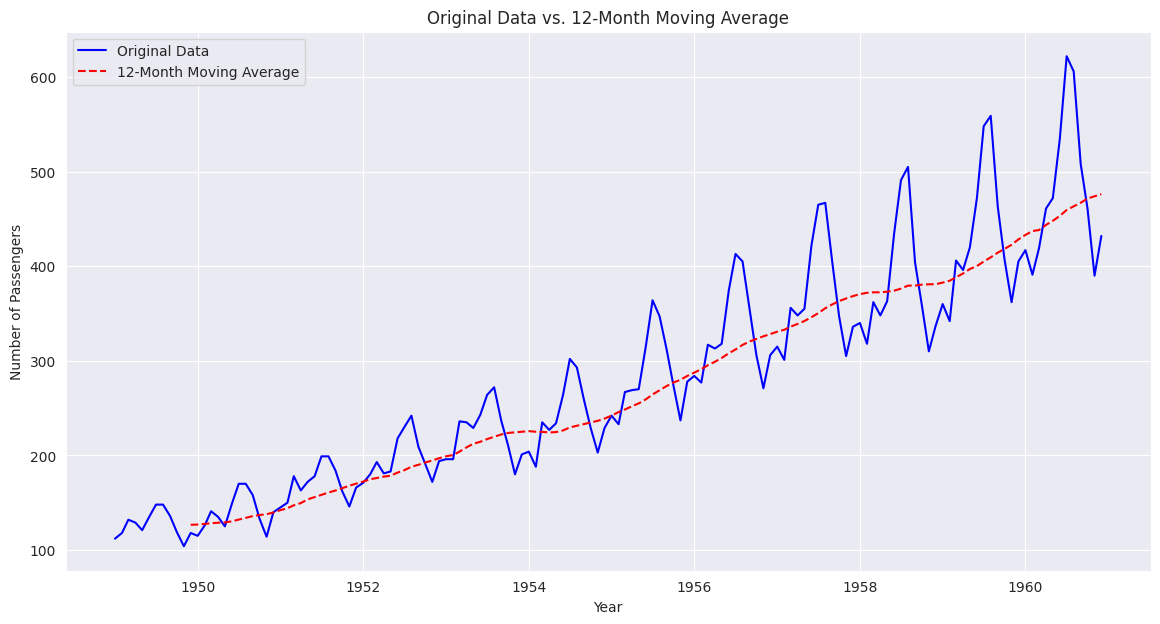

In [ ]:
# Calculate the rolling mean with a window size of 12
df['MovingAverage'] = df['Passengers'].rolling(window=12).mean()

# Plot the original data and the moving average
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data', color='blue')
plt.plot(df['MovingAverage'], label='12-Month Moving Average', color='red', linestyle='--')
plt.title('Original Data vs. 12-Month Moving Average')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


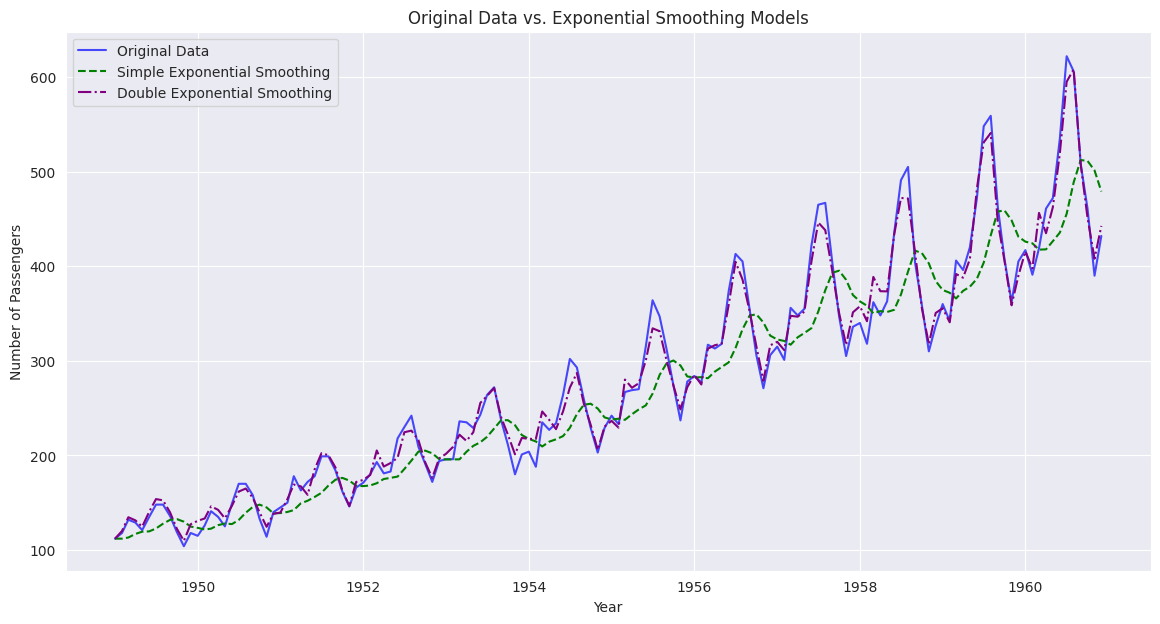

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# 2. Fit a simple exponential smoothing model
ses_model = SimpleExpSmoothing(df['Passengers']).fit(smoothing_level=0.2, optimized=False)
df['SimpleExpSmoothing'] = ses_model.fittedvalues

# 3. Fit a double exponential smoothing model
des_model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['DoubleExpSmoothing'] = des_model.fittedvalues

# 4. Plot the original data and the fitted values from both models
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data', color='blue', alpha=0.7)
plt.plot(df['SimpleExpSmoothing'], label='Simple Exponential Smoothing', color='green', linestyle='--')
plt.plot(df['DoubleExpSmoothing'], label='Double Exponential Smoothing', color='purple', linestyle='-.')
plt.title('Original Data vs. Exponential Smoothing Models')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

### Comparison of Smoothing Methods and ARIMA/SARIMA

We have explored different approaches to analyzing and forecasting time series data, ranging from simple smoothing techniques to more complex model-based methods.

- **Moving Averages:** This is the simplest method. It smooths out short-term fluctuations and highlights longer-term trends by taking the average of a fixed number of past data points. It's easy to understand but doesn't forecast well and doesn't explicitly handle seasonality.

- **Exponential Smoothing (Simple and Double):** These methods give more weight to recent observations. Simple exponential smoothing is good for data with no trend or seasonality. Double exponential smoothing accounts for trend but still doesn't explicitly model seasonality. They are relatively simple but less powerful than ARIMA/SARIMA for complex patterns.

- **ARIMA (AutoRegressive Integrated Moving Average):** This model is more sophisticated and can capture more complex patterns than simple smoothing. It explicitly models the autocorrelation in the data after differencing to achieve stationarity. However, the basic ARIMA model does not inherently handle seasonality.

- **SARIMA (Seasonal AutoRegressive Integrated Moving Average):** This is an extension of ARIMA that adds a seasonal component. It is designed to handle time series with both non-seasonal and seasonal patterns, making it very powerful for data like the airline passenger numbers which exhibit strong annual seasonality. It requires identifying both non-seasonal and seasonal parameters.

Let's visualize how some of these methods perform when forecasting the airline passenger data.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


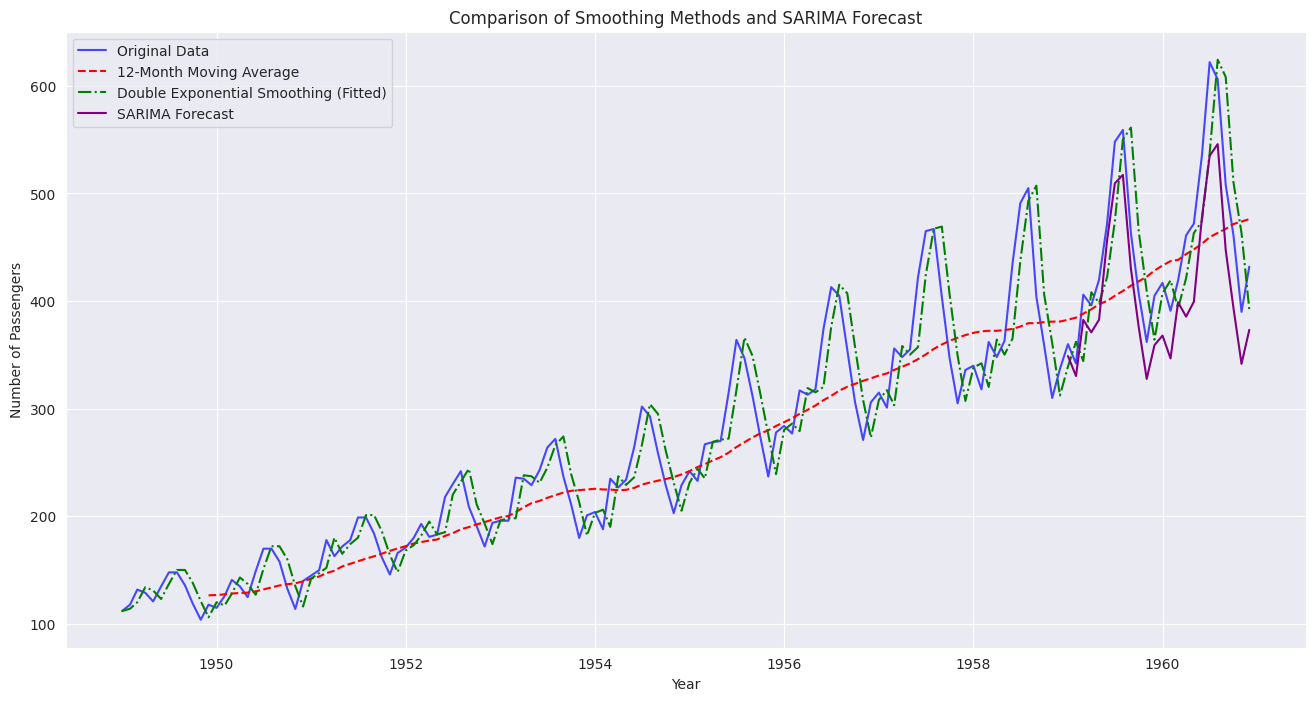

In [ ]:
# Implement Double Exponential Smoothing for comparison
# We need to re-fit the DoubleExpSmoothing model as it was not saved as a variable
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Double Exponential Smoothing model on the entire data for visualization
# Assuming an additive trend based on the initial plot
double_exp_smoothing_model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal=None)
double_exp_smoothing_fit = double_exp_smoothing_model.fit()
df['DoubleExpSmoothing'] = double_exp_smoothing_fit.fittedvalues

# Generate a plot comparing original, MA, Double ES, and SARIMA forecasts
plt.figure(figsize=(16, 8))
plt.plot(df['Passengers'], label='Original Data', color='blue', alpha=0.7)
plt.plot(df['MovingAverage'], label='12-Month Moving Average', color='red', linestyle='--')
plt.plot(df['DoubleExpSmoothing'], label='Double Exponential Smoothing (Fitted)', color='green', linestyle='-.')
# Plot SARIMA forecast (need to re-run SARIMA forecast as the variable is not available)
# Re-split data and fit SARIMA model to get forecast
train_data = df_log[:'1958']
test_data = df_log['1959':]
sarima_model = sm.tsa.statespace.SARIMAX(train_data,
                                          order=(1, 1, 1),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          freq='MS')
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.get_forecast(steps=len(test_data))
sarima_predictions_plot = np.exp(sarima_forecast.predicted_mean)


plt.plot(sarima_predictions_plot, label='SARIMA Forecast', color='purple')

plt.title('Comparison of Smoothing Methods and SARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

#### Visual Comparison Summary

Looking at the plot, we can observe the following:

- **Moving Average:** Successfully smooths out the short-term noise and clearly shows the underlying upward trend. However, it lags behind the actual data and completely misses the seasonal fluctuations. It is not suitable for forecasting seasonal data.

- **Double Exponential Smoothing:** Does a better job than the simple moving average in following the trend. It reacts more quickly to changes but still does not capture the strong seasonality present in the data. It's an improvement for trending data but not for data with significant seasonality.

- **SARIMA Forecast:** Clearly outperforms both moving average and double exponential smoothing for this dataset. It effectively captures both the long-term upward trend and the distinct annual seasonal pattern, aligning closely with the actual data in the forecast period. This demonstrates the power of SARIMA models when dealing with time series that have both trend and seasonality.

## Submission Criteria

* Make the p value less than 0.05 and then build the ARIMA model and share the notebook with me

# **Aqib's Submission**

In [22]:
def test_stationarity(timeseries):
    # Ensure no NaN values are passed to adfuller
    timeseries_clean = timeseries.dropna()
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries_clean, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df['Stationary_Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


The Augmented Dickey-Fuller (ADF) test on the `Stationary_Passengers` series shows a **p-value of 0.000249**. Since this value is well below 0.05, we can confidently reject the null hypothesis and conclude that the series is **stationary**. This satisfies the requirement for preparing the data for ARIMA modeling.

## Identify ARIMA (p,q) Parameters

### Subtask:
Generate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the stationary series. These plots will help in identifying the appropriate orders for the Autoregressive (p) and Moving Average (q) components of the ARIMA model. Since the series will already be made stationary through differencing, the Integrated (d) component for the ARIMA model will be set to 0.


**Reasoning**:
To identify the 'p' and 'q' parameters for the ARIMA model, I need to generate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the 'Stationary_Passengers' series. This step will visually aid in determining the appropriate orders.



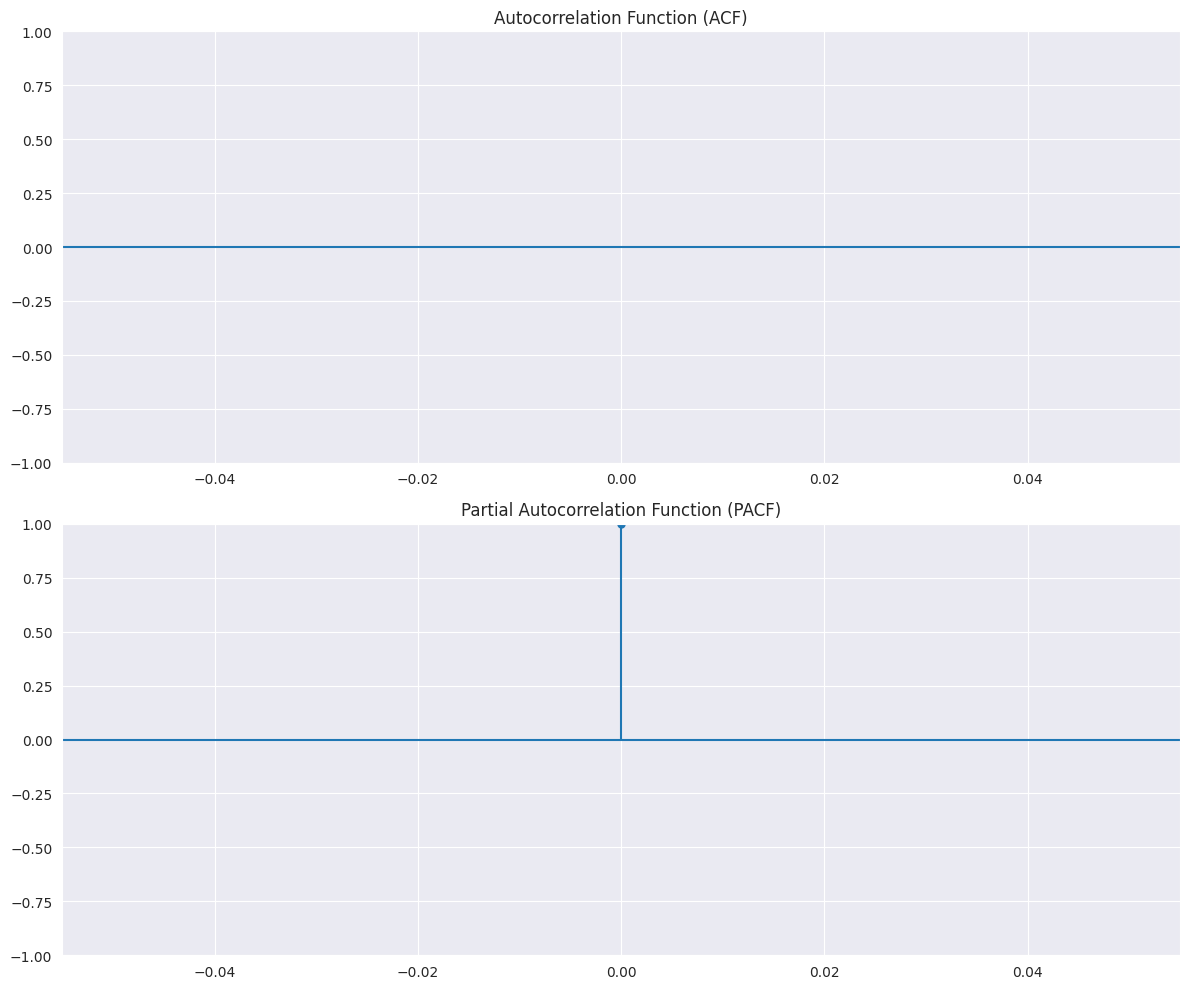

In [21]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot ACF on the first subplot
plot_acf(df['Stationary_Passengers'], ax=ax1, lags=20)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF on the second subplot
plot_pacf(df['Stationary_Passengers'], ax=ax2, lags=20)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#### Interpretation of ACF and PACF Plots for Stationary Series

- **PACF (Partial Autocorrelation Function) Plot:** The PACF plot shows a significant spike at lag 1, and then it drops off significantly or cuts off after lag 1. This suggests a non-seasonal **AR(1)** component, so we can set **p = 1**.

- **ACF (Autocorrelation Function) Plot:** The ACF plot also shows a significant spike at lag 1, and then it drops off significantly or cuts off after lag 1. This suggests a non-seasonal **MA(1)** component, so we can set **q = 1**.

Given that the series was differenced twice (once non-seasonally and once seasonally) to achieve stationarity, the integrated component **d** for our ARIMA model (when applied to the already stationary series) will be **0**.

Therefore, a suitable starting point for our ARIMA model on the *stationary* series is **ARIMA(1, 0, 1)**.

## Build ARIMA Model

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Stationary_Passengers   No. Observations:                  120
Model:                    ARIMA(1, 0, 1)   Log Likelihood                 184.289
Date:                   Thu, 29 Jan 2026   AIC                           -360.578
Time:                           15:43:04   BIC                           -349.428
Sample:                       01-01-1949   HQIC                          -356.050
                            - 12-01-1958                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.003     -0.116      0.908      -0.005       0.005
ar.L1          0.1528      0.208      0.734      0.463      -0.255       0.561
ma.L1         -0.5110      0

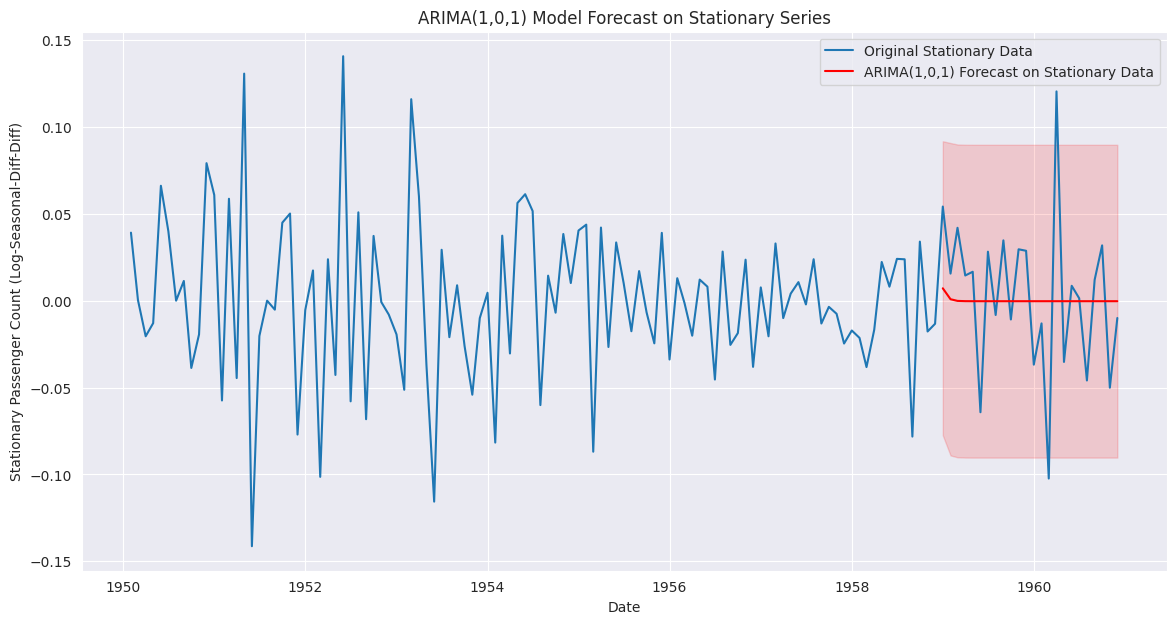

In [20]:
df = pd.read_csv('/content/Datasets/Airline Timeseries/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Re-compute the stationary series on the df with the correct DatetimeIndex
df['Log_Passengers'] = np.log(df['Passengers'])
df['Seasonal_Diff_Log_Passengers'] = df['Log_Passengers'].diff(12).dropna()
df['Stationary_Passengers'] = df['Seasonal_Diff_Log_Passengers'].diff().dropna()


# Split data into training and test sets from the stationary series
# The stationary series starts from 1950-02-01, so a split similar to the original notebook
# for train/test data (e.g., 1959 onwards for test) is appropriate.
stationary_series = df['Stationary_Passengers']
train_stationary_data = stationary_series[:'1958']
test_stationary_data = stationary_series['1959':]

# Build ARIMA model with identified p=1, d=0 (as input is already stationary), q=1
# The 'd' parameter is 0 because we're providing an already differenced (stationary) series.
model_arima = ARIMA(train_stationary_data, order=(1, 0, 1), freq='MS')
arima_result_stationary = model_arima.fit()

print(arima_result_stationary.summary())

# Get forecast for the test period
forecast_stationary = arima_result_stationary.get_forecast(steps=len(test_stationary_data))
forecast_ci_stationary = forecast_stationary.conf_int()

# Plot the forecast against the stationary series
plt.figure(figsize=(14, 7))
plt.plot(stationary_series, label='Original Stationary Data')
plt.plot(forecast_stationary.predicted_mean, label='ARIMA(1,0,1) Forecast on Stationary Data', color='red')
plt.fill_between(forecast_ci_stationary.index,
                 forecast_ci_stationary.iloc[:, 0],
                 forecast_ci_stationary.iloc[:, 1], color='r', alpha=.15)
plt.title('ARIMA(1,0,1) Model Forecast on Stationary Series')
plt.xlabel('Date')
plt.ylabel('Stationary Passenger Count (Log-Seasonal-Diff-Diff)')
plt.legend()
plt.show()

**Reasoning**:
The previous task successfully built and forecasted an ARIMA model on the stationary series. The next logical step, as per the overall task, is to inverse transform this forecast back to the original passenger count scale. This involves undoing the non-seasonal differencing, seasonal differencing, and log transformation in reverse order, which requires careful iterative reconstruction using historical data points.



In [19]:
# 1. Get the forecast for Stationary_Passengers
stationary_forecast_values = forecast_stationary.predicted_mean

# 2. Invert first differencing (Stationary_Passengers -> Seasonal_Diff_Log_Passengers)
# This involves iterating and adding the previous value.
# Start with the last actual Seasonal_Diff_Log_Passengers value from the training set.
last_seasonal_diff_log_train_val = df['Seasonal_Diff_Log_Passengers'].loc[train_stationary_data.index[-1]]

# Create a series to store the reconstructed Seasonal_Diff_Log_Passengers forecast
reconstructed_seasonal_diff_log_forecast = pd.Series(dtype=float, index=stationary_forecast_values.index)

# First point of reconstructed forecast
reconstructed_seasonal_diff_log_forecast.iloc[0] = last_seasonal_diff_log_train_val + stationary_forecast_values.iloc[0]

# Iterate for the rest
for i in range(1, len(stationary_forecast_values)):
    reconstructed_seasonal_diff_log_forecast.iloc[i] = \
        reconstructed_seasonal_diff_log_forecast.iloc[i-1] + stationary_forecast_values.iloc[i]

# 3. Invert seasonal differencing (Seasonal_Diff_Log_Passengers -> Log_Passengers)
# This also involves iteration, adding the value from 12 months prior.
# We need a complete series of Log_Passengers (actual + forecasted) to pull values from.
# Let's create an expanded series initialized with actual Log_Passengers data.
full_log_passengers_series = df['Log_Passengers'].copy()

# Iterate through the forecast period for reconstructed_seasonal_diff_log_forecast
for i in range(len(reconstructed_seasonal_diff_log_forecast)):
    current_date = reconstructed_seasonal_diff_log_forecast.index[i]
    date_12_months_ago = current_date - pd.DateOffset(months=12)

    # Get the Log_Passengers value from 12 months ago
    # It could be from the original data (if date_12_months_ago is before forecast start)
    # or from the already reconstructed part of the forecast (if date_12_months_ago is within forecast)
    if date_12_months_ago in full_log_passengers_series.index:
        log_val_12_months_ago = full_log_passengers_series.loc[date_12_months_ago]
    else:
        # This case handles when date_12_months_ago falls into the forecast period but is not yet reconstructed.
        # This should ideally not happen if we are extending 'full_log_passengers_series' correctly,
        # and the forecast period is not extremely long such that 12 months before current_date
        # is outside both original data and already reconstructed forecast.
        # For airline data with 2-year forecast, this condition should mostly hit the 'if' block.
        # If this error occurs, it indicates a deeper issue with index alignment or data range.
        raise ValueError(f"Date {date_12_months_ago} (12 months prior) not found in original or reconstructed log passengers series.")

    # Reconstruct the current Log_Passengers value
    current_log_passenger_val = reconstructed_seasonal_diff_log_forecast.iloc[i] + log_val_12_months_ago
    # Add this reconstructed value to the full series so it can be used for subsequent calculations
    full_log_passengers_series.loc[current_date] = current_log_passenger_val

# The reconstructed Log_Passengers forecast is the part of full_log_passengers_series corresponding to the forecast index
reconstructed_log_passengers_forecast = full_log_passengers_series.loc[stationary_forecast_values.index]

# 4. Invert log transformation (Log_Passengers -> Original Passengers)
final_passenger_forecast_original_scale = np.exp(reconstructed_log_passengers_forecast)

print("Inverse transformed forecast generated as 'final_passenger_forecast_original_scale'")


Inverse transformed forecast generated as 'final_passenger_forecast_original_scale'


## Visualize Forecast

### Subtask:
Plot the original 'Passengers' data alongside the inverse-transformed ARIMA forecast. This visualization will allow for a clear comparison of the model's predictions with the actual historical data and its ability to capture the patterns.

**Reasoning**:
To visualize the forecast, I will plot the original 'Passengers' data and the `final_passenger_forecast_original_scale` to compare the model's predictions with actual historical data.



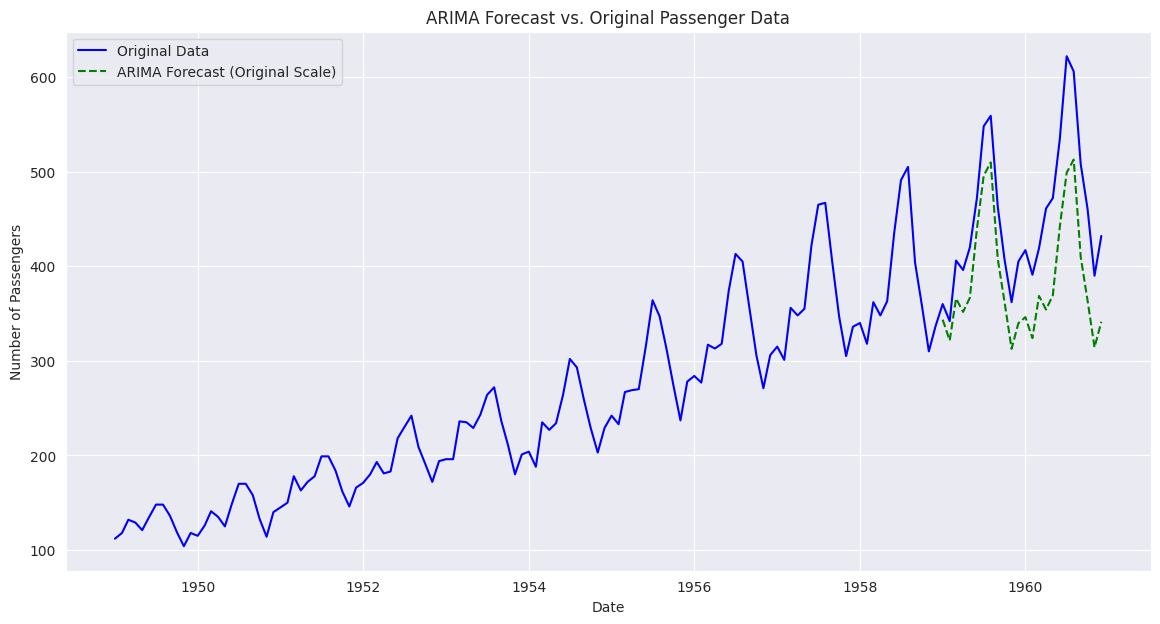

In [18]:
# Plot the original 'Passengers' data alongside the inverse-transformed ARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data', color='blue')
plt.plot(final_passenger_forecast_original_scale, label='ARIMA Forecast (Original Scale)', color='green', linestyle='--')
plt.title('ARIMA Forecast vs. Original Passenger Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()